<div align="right"><sub>Advanced Algorithms, Semester 2, 2022</sub>
</div>


# Assessment 2
Due Date: Monday, November 14th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

### PLEASE INPUT YOUR NAME HERE:
Monty Wood
---


##### Learning outcomes
- <font size="1">1.	Critically evaluate the ecosystem of algorithmic tools available to solve complex computational problems in a variety of disciplines.</font>
- <font size="1">2.	Choose and implement state-of-the-art algorithms and data structures solutions for a variety of computational problems. </font>
- <font size="1">3.	Critically judge algorithmic performance and push for optimization of computational resources</font>

## Searching

<ol start="1">

<li>
Implement a recursive version of the binary search algorithm.
   
</li></ol>

In [55]:
# Solution
def recursiveBinarySearch(arr, x):
        
    if len(arr) == 0:
        return False
    else:
        mid = len(arr) // 2
        if arr[mid] == x:
            return  True
        else:
            if x < arr[mid]:
                return recursiveBinarySearch(arr[:mid],x)
            else:
                return recursiveBinarySearch(arr[mid+1:],x)
       
    

In [56]:
# Test                   
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(recursiveBinarySearch(testlist, 3))
print(recursiveBinarySearch(testlist, 42))


False
True


<ol start="2">
<li> 
    <b>(Hard)</b> Write an algorithm to find whether a value exists in a sorted 2D matrix of dimensions $n \times n$. A sorted 2D matrix is a matrix where all the elements in each row are sorted, and all the elements in each column are also sorted. Take advantage of the sorted nature of the matrix in order to come up with an algorithm that is able to carry the search in $O(n)$ time complexity instead of the naïve $O(n^2)$

$$\begin{bmatrix}
20  & 40 & 63 & 80 \\
30  & 50 & 80 &  90 \\
40  & 60 & 100 & 110 \\
50  & 65 & 105 & 150 \\    
\end{bmatrix}$$
</li>  </ol>

In [13]:
# Solution
def findValueInSortedMatrix(alist, num):
    
    col = 3
    row = 0
    while row < len(alist) and col >= 0:       
        if alist[row][col] == num:
            return (row, col)
        elif alist[row][col]>num:            
            col = col-1
        else:
            row = row+1
    return None
            
        

In [16]:
# Test
matrix = [[20, 40, 63, 80],
          [30, 50, 80, 90],
          [40, 60, 100, 110],
          [50, 65, 105, 150]]

print(findValueInSortedMatrix(matrix,60)) #Item exists
print(findValueInSortedMatrix(matrix,49)) #Item doesn't exist

(2, 1)
None


## Hashing

<ol start="3">

<li>
Implement a map data structure that maps strings to values (striving to search in $O(1)$ time) and uses chaining for collision resolution. Use a Python list for chaining. Monitor the load factor of the data structure every time you add a new value and try to implement the functionality so your data structure dynamically doubles its size whenever the load factor $\lambda$ exceeds 0.7.
</li></ol>    

In [1]:
# Solution
class HashTable:
    def __init__(self):
        self.size = 7
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def __getitem__(self, key):        
        return self.size[key]
    
    def __setitem__(self, key, value):        
        self.size[key] = value          
        
        
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))

                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data
                else:
                    self.data[nextslot] = data #replace     
                    
    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size              

In [2]:
#Test
H=HashTable()
print(H.slots,"->",H.data)

H["cat"]="Meow"
print(H.slots,"->",H.data)

H["dog"]="Woof"
print(H.slots,"->",H.data)

H["sheep"]="Baa"
print(H.slots,"->",H.data)

H["mouse"]="Squeak"
print(H.slots,"->",H.data)

H["duck"]="Quack"
print(H.slots,"->",H.data)

print(H["mouse"]) 

#With the next addition, the load factor exceeds 0.7 and your hash table should adapt Dynamically. 
H["wolf"]="Ahh-wooo"
print(H.slots,"->",H.data)

[None, None, None, None, None, None, None] -> [None, None, None, None, None, None, None]


TypeError: 'int' object does not support item assignment

## Sorting



<ol start="4">

<li>
Insertion sort is very inefficient because of the number of comparisons needed on the growing sorted sublists. Take advantage of binary search to find the proper location to insert the selected item at each iteration and thus reduce the number of necessary comparisons carried out by insertion sort to $O(n log(n))$.
</li></ol>       

In [80]:
# Solution
def BinarySearch(arr, x, start, end):
        
    if start == end:
        if arr[start] > x:
            return start
        else:
            return start+1
    if start > end:
        return start
    
    mid = (start+end)//2
    if arr[mid] < x:
        return BinarySearch(arr, x, mid+1, end)
    elif arr[mid] > x:
        return BinarySearch(arr, x, start, mid-1)
    else:
        return mid

def BinarySearchEnhancedInsertionSort(arr):
    for i in range(1,len(arr)):

        x = arr[i]
        j = BinarySearch(arr, x, 0, i-1)
        arr = arr[:j] + [x] + arr[j:i] + arr[i+1:]
    return arr

 


In [81]:
#Test
print("Sorted array:")
print(BinarySearchEnhancedInsertionSort([37, 23, 0, 17, 12, 72, 31,46, 100, 88, 54]))

Sorted array:
[0, 12, 17, 23, 31, 37, 46, 54, 72, 88, 100]


## Thinking exercise

<ol start="5">

<li>
    <b>(Hard)</b> Write an algorithm that takes in a list of $n$ sorted integers in the range $0$ to $k$, preprocesses its input and then is able to answer queries about how many of the $n$ integers fall into a range $[a \dots b]$ in $O(1)$ time. The preprocessing running time of the algorithm should be at most $\Theta(n + k)$. For an input such as $a=[2,4,6,8,10]$, $n=5$ and the range is $2$ to $k=10$. After preprocessing, your algorithm should be able to return how many elements in `a` fall within a given range. For instance:
</li></ol> 

- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)` -> 3
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)` -> 2
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)` -> 0
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)` -> 5

I recommend that you implement the algorithm within a Python class so you can use the constructor for doing the preprocessing.

In [29]:
# Solution


In [12]:
# Test
ElementsInIntervalCounterObject = ElementsInIntervalCounter([2,4,6,8,10])
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5))
print(ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10))

3
2
0
5


## Probability

<ol start="6">

<li>
Let's create a very simple Bayesian spam filter. In imaginary land, emails are written with a vocabulary of only 6 words. Spam emails and not spam emails use the  six word vocabulary with different frequencies. 80% of the email traffic in imaginary land is spam and the reminder 20% is legitimate emails. You are given the task of creating a spam filter detection algorithm. You decide that is a good idea to exploit your knowledge of Bayesian statistics to tackle this problem. Thus, create an algorithm that given an input sentence (the email) returns the probability that the input sentence is spam and the probability that the input sentence is not spam.
</li>

Hint: the first thing to do is to estimate the probabilities of the vocabulary within the spam and not-spam categories

| Word  | Spam  |  Not spam |
|---|---|---|
| viagra| 0.26  |  0.05 |
| money | ... | ... |
| sex   | ... | ...  |
| dear  | ...  | ...  |
| friend  | ...  | ... |
| meet  | ... | ...  |

In [13]:
#Solution


In [63]:
# Test 
#emails
spamEmails=["viagra sex meet money sex", "dear viagra sex viagra viagra", "sex friend viagra", "sex money sex", "sex friend money"]
notSpamEmails=["dear friend money meet", "meet dear viagra friend", "friend meet dear", "dear dear friend", "dear sex", "sex dear"]

spamWordsProbs = calculateFrequencies(spamEmails)
notSpamWordsProbs = calculateFrequencies(notSpamEmails)

#making sure probabilities add up to 1 (0.9999999 is fine). If this is not  the case, something is wrong in the probabilities estimation
totalSpamWordsProbs=0
totalNotSpamWordsProbs=0
for k,v in spamWordsProbs.items():
    totalSpamWordsProbs +=spamWordsProbs[k]#we could have also use v
    totalNotSpamWordsProbs += notSpamWordsProbs[k]

print(totalSpamWordsProbs,totalNotSpamWordsProbs)

fractionOfSpamEmails=0.8
fractionOfNotSpamEmails=0.2

email1 = "dear friend meet"
pSpam, pNotSpam = bayesianSpamFilter(email1,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email1, pSpam, pNotSpam))

email2 = "viagra money sex dear money"
pSpam, pNotSpam = bayesianSpamFilter(email2,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email2, pSpam, pNotSpam))

email3 = "dear friend meet sex sex money viagra meet"
pSpam, pNotSpam = bayesianSpamFilter(email3,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email3, pSpam, pNotSpam))

0.9999999999999999 0.9999999999999999
Sentence: "dear friend meet" Probably spam: 0.074912. Probability not spam: 0.925088
Sentence: "viagra money sex dear money" Probably spam: 0.985649. Probability not spam: 0.014351
Sentence: "dear friend meet sex sex money viagra meet" Probably spam: 0.791014. Probability not spam: 0.208986


## Stochastic Algorithms and the Monte Carlo Method

<ol start="7">

<li>
    Using the explanation given in lecture <i>19 Stochastic Algorithms</i>, Use the Monte Carlo method to estimate $\Large\pi$ (3.141592...) to at least 3 significant digits
</li></ol>

In [ ]:
#Solution


## Statistics


<ol start="8">

<li>
The company you have been working for has been purchasing a certain type of electronic device from 2 different manufacturers A and B. The company has also recorded historical data on the amount of days that each previous device  has worked until it completely failed. Given that one device has failed after 150 days but you don't know its manufacturer, calculate how much more likely (i.e. the ratio) it is that such a device came from one manufacturer than the other given the historical empirical data recorded by the company previously. 

<i>Hint:</i> plotting the probability density function of both manufacturers failing times will help you in finding a solution to this problem, then just calculate $\frac{\text{probability of failure manufacturer B}}{\text{probability of failure manufacturer A}}$
</li></ol>

In [18]:
import numpy as np
timeToFailureA= np.array([124.62144667, 106.13364854, 117.74858357,  98.74290026,
       103.3165112 , 109.72744164,  74.01571789, 106.96158141,
       102.28982005,  99.93051826,  76.60901943,  80.39714236,
        55.02793069,  85.45208982, 104.22170406,  85.99599947,
       112.59869994,  95.79109313,  83.50542866, 119.92770958,
        81.8058076 , 102.76322206,  99.67864073,  87.89222674,
        71.25176532,  74.88191707, 117.17865584, 109.09116925,
       124.53409657,  87.8173293 ,  99.85197306, 124.04364403,
       102.31833973, 119.2685315 , 112.25864129,  74.06716133,
        97.05767201,  83.66841935,  87.02851635,  91.66139228,
       104.88832752, 115.1732398 , 103.63461105,  78.2541082 ,
        74.35189505, 120.79622949, 106.16998993, 126.44951788,
        80.11259273, 112.08673548, 112.80531948, 122.5683024 ,
       120.50591968, 121.00171553,  70.26754123, 107.70698575,
       105.5337795 ,  86.12288747,  82.52946909, 115.65037522,
        79.24456862,  69.77690732,  91.86320981, 117.09220437,
       118.01883261,  98.33183627, 107.19247907,  97.10067157,
        85.06162182, 122.43982811,  71.85322262,  88.30531166,
        73.58362537,  87.83562595,  88.37756428, 131.28037359,
        92.65581904,  90.66214423,  97.51430688, 111.31124483,
       112.65648278, 118.5525132 ,  76.4713513 ,  98.49046739,
        74.24616398, 109.50293034,  88.4381382 ,  85.70565343,
       103.29975178,  83.72179567, 121.80909889, 128.71077746,
        75.52340396, 103.13401586,  94.65296786,  99.66973694,
        87.94468956, 126.09744162,  78.68529841,  95.27664898])
    
timeToFailureB= np.array([194.60055076, 127.84076582,  72.63459054,  72.14816055,
       113.55202239,  50.10477096, 116.65576045,  70.98809983,
        59.13363405,  82.27853051,  86.21977609, 122.06109083,
        39.79661448,  78.23934262, 138.79338423,  95.03231458,
        42.76667884,  72.52572671,  80.03069495,  40.64781381,
        62.95969861,  95.58983023, 124.48673192, 101.20750649,
        75.8133936 ,  30.28037538, 102.57269689, 144.30813776,
         8.349275  ,  87.56214613,  51.79287217,  92.36511375,
       132.2346495 ,  62.20459029, 105.31097184, 101.22537309,
        93.42104048,  72.02333095,  70.4659164 ,  73.40353751,
        43.78113965, 149.42580924,  65.80027562,  81.36351794,
        41.52233909,  72.17188767,  82.3835437 ,  92.35621193,
       111.01681144, 122.77975357,  88.7625561 ,  93.73549594,
       149.98888888,  98.02150134,  22.14345481,  89.31296595,
        90.81117642, 104.66191168,   8.64838967,  70.88562985,
        74.49570711, 103.97872516, 121.5995122 , 140.61780803,
        44.46878759,  76.73994346,  89.6503097 , 107.5186432 ,
        56.11700449, 152.05016799,  85.82639732,  21.0378077 ,
        93.06672928, 100.63602946, 108.24573072, 108.02669327,
       125.7566677 ,  89.48259258, 108.94840528, 101.68254614,
       106.09409152, 129.8037404 ,  89.62153564, 127.1854666 ,
        61.20319795,  96.35222993,  85.89363838,  93.17040435,
        87.61693674, 117.79106743,  97.59089942, 108.0501719 ,
        54.71134006,  48.52256069, 101.75135174,  29.61525461,
        40.66256675,  90.28140209, 108.52980168,  69.62657946])

In [30]:
#solution



## Trees

<ol start="9">

<li>Using the <i>BinaryTree</i> class implementation from  <i>practical1</i> in the <i>trees and tree algorithms lecture</i> and a Queue data structure, implement a breadth first traversal of a binary tree, like the following:</li>
</li></ol>

![](./images/bsf.png)

In [20]:
#Solution
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key


In [21]:
# Test    
t = BinaryTree(1)
t.insertLeft(2)
t.getLeftChild().insertLeft(4)
t.getLeftChild().insertRight(5)
t.insertRight(3)

#t.getRightChild().getRootVal()
breadth_first_traversal(t)

NameError: name 'breadth_first_traversal' is not defined

<ol start="10">
    <li>
        Using the `buildHeap` from the <i>practical</i> in the <i>trees and tree algorithms lecture</i>, write a sorting function that can sort a list in $O(n log(n))$ time.
</li></ol>

In [21]:
#Solution


In [22]:
#Test
bh = BinaryHeap()
s=bh.heapSort([9,14,11,17,18,19, 21, 33, 27])
print(s)

[9, 11, 14, 17, 18, 19, 21, 27, 33]


## Binary search trees

<ol start="11">

<li>
Write a function (or a couple of functions) that are able to check whether a binary tree is a valid binary search tree (BST). Recall that a binary search tree relies on the <i>bst</i> property: keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree
</li>

In [23]:
#Solution


Use the following code that creates a binary search tree to check your solution:

In [24]:
# Test
from utils import TreeNode, BinarySearchTree

mytree = BinarySearchTree()
mytree.put(1,1)
mytree.put(3,3)
mytree.put(2,2)

#so we have created a binary search tree that looks like this:

# 1
#  \
#   3
#  /   
# 2

# check that is a valid binary search tree with the validate function you should have implemented above
print(validateBinaryTree(mytree)) #Should return True

# Let's break the binary search tree property:
mytree.root.key = 5

# now the tree looks like this:

# 5
#  \
#   3
#  /   
# 2

# and is clearly not a binary search tree (the right child of the root key is not larger than the root key)

# our validateBinaryTree function should detect that this object is no longer a binary search three:

print(validateBinaryTree(mytree)) #Should return False

True
False


## Genetic algorithms

<ol start="12">

<li>
    <b>(Hard)</b>... but fun AND powerful technique if you get it working!). In this task you need to create a genetic/evolutionary algorithm that evolves a randomly initialized "chromosome" into an approximation to a target image. 
</li>
</ol>

- As fitness function, I suggest that you calculate the matrix difference between the target image and a candidate solution from the population and then take the norm of the matrix `np.linalg.norm()` to get a scalar number that quantifies the "size" of the matrix difference (i.e. the distance between the target image and a candidate solution). Notice that with such a fitness function, the fittest candidates solutions will have a low score (i.e. low distance to the target function)

- To ensure that the required computation time does not get too large, we will reduce the target image to a relatively low resolution (50x50 pixels)

- Use a population size of around 500 chromosomes/individuals

- I recommend that you use a mutation rate of around 1%

- I recommend that you use random crossover points to speed up convergence upon the solution

- your solution should be computationally efficient, I should not need more than 5 minutes to run it

- Store partial solutions during the evolutionary process in a variable list named `solutionsList` so I can test that your algorithm works

50 50


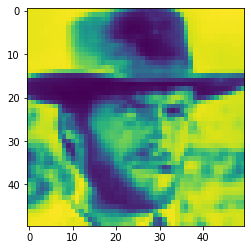

In [1]:
#some preliminary code to help you get started
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from scipy import misc
import numpy as np
import sys
import imageio
import skimage.transform

#you can work with any image
target = imageio.imread('./images/ce.jpg')[:,:,0]

#New way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#pixel values are also normalized by default from a [0-255] range to a more convenient [0-1] range 
target=skimage.transform.resize(target, (50,50), mode= 'reflect',anti_aliasing=True) 

#Old way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#target=scipy.misc.imresize(target, (50,50))
#we normalize the pixel values manually from a range [0-255] to a more convenient range [0-1]
#target = target/255

plt.imshow(target)

xDim=target.shape[0]
yDim=target.shape[1]
print(xDim,yDim)

#dimensions of chromosomes (i.e. candidate solutions in the population)
dim =xDim*yDim

#we transform our target into a one-dimensional array for ease of computation
target1D=target.flatten() 

#the mutation rate you should use 
mutationRate= 0.0005 #0.01

# Population size
populationSize = 500

In [ ]:
#Solution


This is an illustration of the sample outputs I get during the evolutionary process every 500 steps for a total of 10,000 steps. The computation takes less than two minutes in my modest laptop. Obviously, better results can be achieved with more computational steps, a larger population or fine-tuning parameters such as the mutation rate, the fitness selection algorithm or the cross over point criteria, but as a proof of concept, this should be enough. Notice that the algorithm progresses very fast in terms of fitness at the beginning of the evolutionary procedure and eventually slows down towards the end.

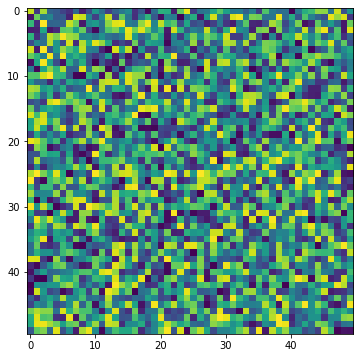

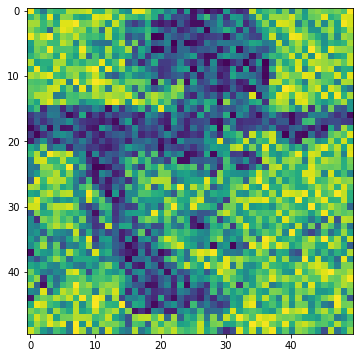

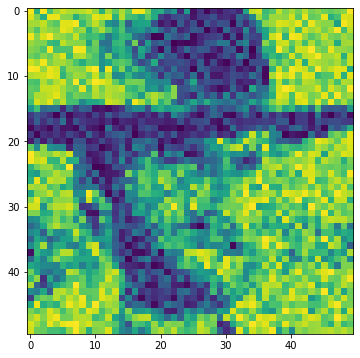

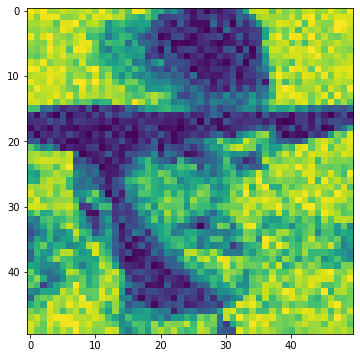

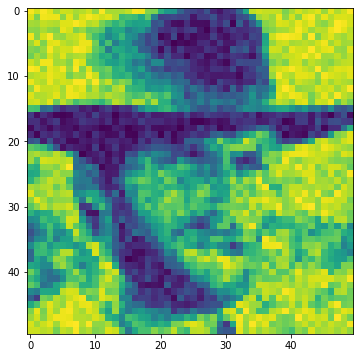

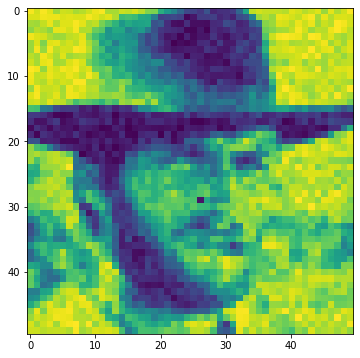

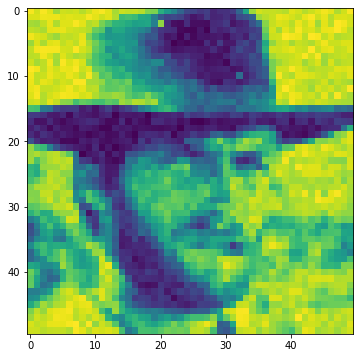

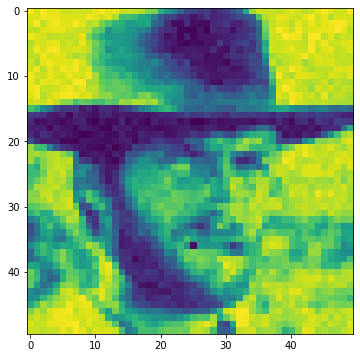

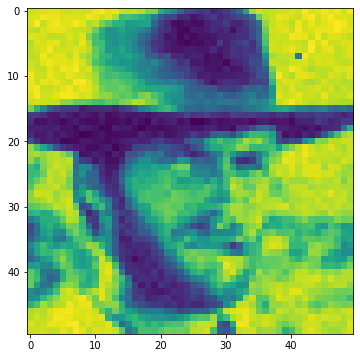

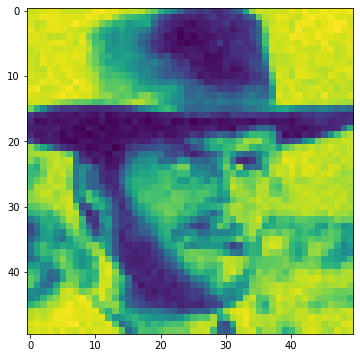

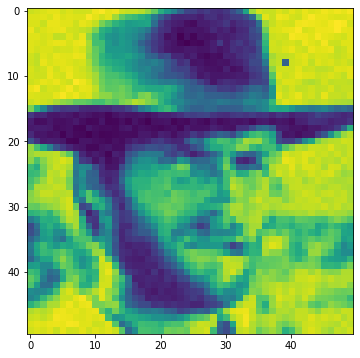

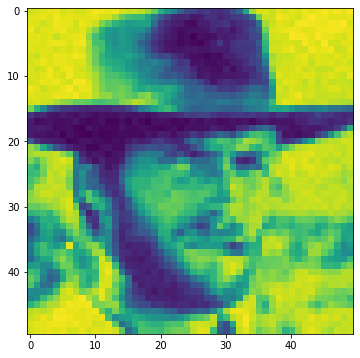

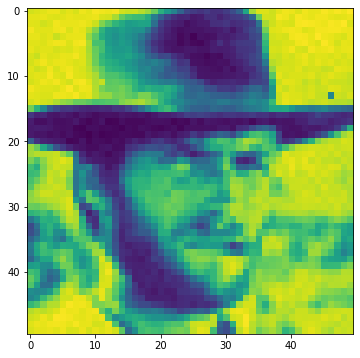

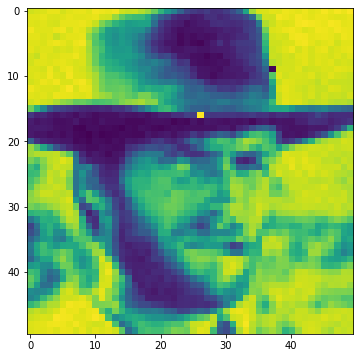

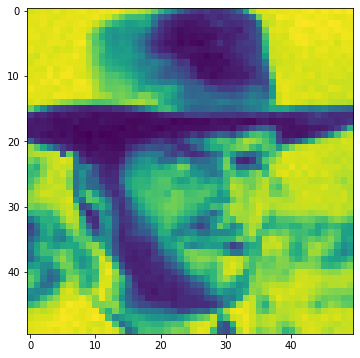

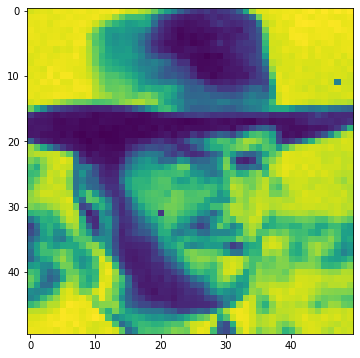

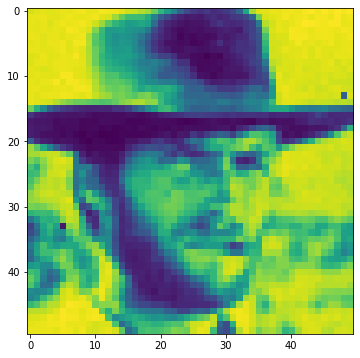

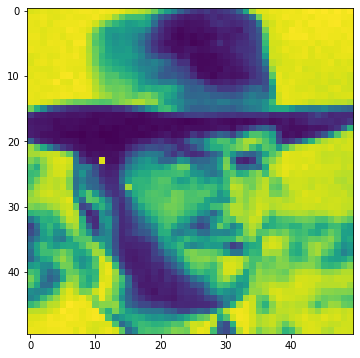

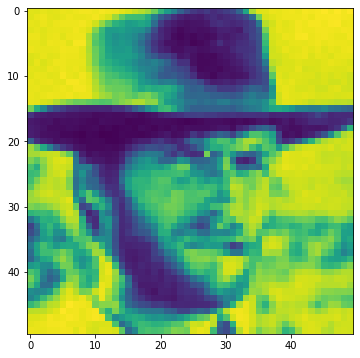

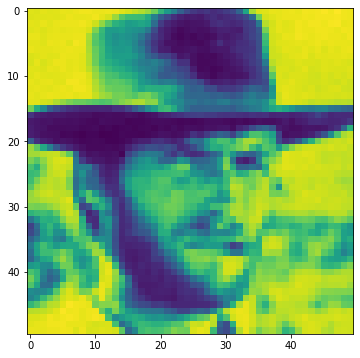

In [30]:
%matplotlib inline
for i in solutionsList:
    plt.figure(figsize=(9, 6))
    plt.imshow(i)

## Graphs

<ol start="13">

<li>
The following graph `f` describes flight connections between different cities in the world. You're trying to create a flight search engine that minimizes the number of flights to get from one city to another. Show the solution to this problem by finding the shortest path from Dunedin to Rome.
</li>

In [1]:
from utils import Graph, Vertex, Queue
f = Graph()
f.addVertex('Dunedin');f.addVertex('Wellington');f.addVertex('Auckland');f.addVertex('Queenstown');f.addVertex('Christchurch');
f.addVertex('Tauranga');f.addVertex('London');f.addVertex('New York');f.addVertex('Berlin');f.addVertex('Beijing');
f.addVertex('Tokyo');f.addVertex('Moscow');f.addVertex('Rome');f.addVertex('Paris');f.addVertex('Brussels');
f.addVertex('Washington DC');f.addVertex('Los Angeles');f.addVertex('San Francisco');f.addVertex('Dubai');
f.addVertex('New York'); f.addVertex('Santiago de Chile')
            
f.addEdge('Dunedin','Auckland')
f.addEdge('Auckland','Beijing')
f.addEdge('Tokyo','London')
f.addEdge('Dunedin','Wellington')
f.addEdge('London','Madrid')
f.addEdge('Madrid','Rome')
f.addEdge('Tokyo','Rome') #
f.addEdge('Auckland','Santiago de Chile')
f.addEdge('Auckland','San Francisco')
f.addEdge('Santiago de Chile','New York')
f.addEdge('Auckland','Dubai')
f.addEdge('Dubai','Rome')
f.addEdge('Beijing','Tokyo')
f.addEdge('San Francisco','Tokyo')
f.addEdge('San Francisco','New York')
f.addEdge('Los Angeles','San Francisco')
f.addEdge('New York','London')
f.addEdge('New York','London')

In [6]:
#Solution
from utils import Graph, Vertex, Queue

def bfs(g,start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            if (nbr.getColor() == 'white'):
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
        currentVert.setColor('black')
        
def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())

In [7]:
#Test
bfs(f,f.getVertex('Dunedin'))
traverse(f.getVertex('Rome'))
f.getVertex('Rome').getDistance()

Rome
Dubai
Auckland
Dunedin


3

<ol start="14">

<li>
The following graph represents latencies (in seconds) within a computer network for packages to travel from one router to another. Using an appropriate algorithm estimate what would be the minimum total latency to go from `routerA' to 'routerK'. Also, extract from the computational graph the optimal route.
</li>

![](./images/routerNetwork.png)

In [30]:
#Solution

from utils import PriorityQueue, Graph, Vertex

f = Graph()
f.addVertex('routerA');f.addVertex('routerB');f.addVertex('routerC');f.addVertex('routerD');
f.addVertex('routerE');f.addVertex('routerF');f.addVertex('routerG');f.addVertex('routerH');f.addVertex('routerI');
f.addVertex('routerJ');f.addVertex('routerK')
            
f.addEdge('routerA','routerB',1)
f.addEdge('routerA','routerC',1)
f.addEdge('routerA','routerD',2)
f.addEdge('routerB','routerE',3)
f.addEdge('routerB','routerF',4)
f.addEdge('routerC','routerG',3)
f.addEdge('routerD','routerG',1)
f.addEdge('routerE','routerH',3)
f.addEdge('routerE','routerI',3)
f.addEdge('routerE','routerF',2)
f.addEdge('routerF','routerI',1)
f.addEdge('routerG','routerF',4)
f.addEdge('routerG','routerI',2)
f.addEdge('routerG','routerJ',4)
f.addEdge('routerH','routerK',1)
f.addEdge('routerH','routerI',1)
f.addEdge('routerI','routerK',2)
f.addEdge('routerJ','routerK',1)

def dijkstra(aGraph,start):
    pq = PriorityQueue()
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not pq.isEmpty():
        currentVert = pq.delMin()        
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance( newDist )
                nextVert.setPred(currentVert)
                pq.decreaseKey(nextVert,newDist)
                


In [31]:
dijkstra(f,f.getVertex('routerA'))
f.getVertex("routerK").getDistance()

7

<ol start="15">

<li>
This question does not require you to write any code, but perhaps it would be helpful for you to grab a pen and a paper and think hard about it. Let's say you need to explore a huge tree. Imagine you are creating a web crawler that is trying to index a huge Internet domain (for example www.amazon.com) by following every link found during the crawling. The crawling starts from the root URL of the domain and proceeds by recursively following every link found in each html page. The only requirement is that each link to be followed has to point within the domain (that is, a link pointing to an outside domain for example www.google.com is not followed, otherwise the crawling would not end in a reasonable amount of time). Links that have already been parsed are ignored. In essence, you are trying to traverse the tree represented by the domain. You are trying to decide whether to implement breadth first search or depth first search to manage the list of links popping up during crawling and that need to be followed up by the crawler. Which approach would be easier on RAM memory? (i.e. consumes less memory) <i>Hint:</i> Breadth first search builds a search tree one level at a time and stores every link found within a level into a Queue. Depth first search creates a search tree by exploring one branch of the tree as deeply as possible (a path from root to leaf) and stores every link found in the path into a Stack. 
</li>
</ol>

**Explain your reasoning**

In [9]:
#Solution

#Write your answer here
depth first search because stack grows linierly   


SyntaxError: invalid syntax (Temp/ipykernel_3096/653071765.py, line 4)

## Blockchain and Cryptocurrencies

On May 22, 2010 Laszlo Hanyecz made the first recorded purchase of a physical good using Bitcoin. He spent 10,000 Bitcoin to purchase two Papa John’s pizzas.  Since Papa John’s didn’t accept Bitcoin as payment, he posted a 10,000 Bitcoin offer on Bitcointalk.org and a 19-year student, took the offer for an estimated $41, bought the two pizzas and delivered. 

![](./images/pizzas.jpg)

Today, the Bitcoin community worldwide commemorates May 22 as the first recorded day that Bitcoin was used to purchase a physical good.
10,000BTC today are worth these many NZD:

In [82]:
from bit.network import satoshi_to_currency_cached
transactionCostInBTC=10000
satoshisToBTCFactor=10**8
satoshi_to_currency_cached(transactionCostInBTC*satoshisToBTCFactor,'nzd')

'348068221.37'

<ol start="16">

<li>
The hash of the pizza transaction is<br>
a1075db55d416d3ca199f55b6084e2115b9345e16c5cf302fc80e9d5fbf5d48d <br>
Use bitcoin-cli or Bitcoin Core GUI Console to find out the destination address that received the 10,000BTC. Then, using an online blockchain explorer, find the balance of that account as of today.
</li>
</ol>

In [ ]:
# Solution


<ol start="17">

<li>
Using the Python bit library send 0.00002 tBTC (i.e. test Bitcoin, not real Bitcoin) to address:<br> moh3eUR3ZTsd2v7Ynwgbup5QSjq8FHrQxv <br>
Use a test bitcoin (tBTC) faucet to fund your account. Include a message in the transaction containing your name and last name. Print out the transaction Hash so I can check it myself.
</li>
</ol>

In [ ]:
# Solution


In [1]:
#TEST
from bit import network
# Substitute your own transaction hash below
TransactionInHexadecimal=network.NetworkAPI.get_transaction_by_id_testnet('f6e92d49e897fc56969d731e8c5a88912fb7e4788f278c77545a543f02065dee')
# You should be able to see your name at the end of the following print out if everything went correctly 
print(bytes.fromhex(TransactionInHexadecimal))
# or If you have properly set up bitcoin-core and RPCs and `bitcoin-qt -server`, you can view the transaction with:
# !bitcoin-cli -conf=PATH_TO_/bitcoin.conf -rpcuser=a -rpcpassword=b decoderawtransaction 01000000017043....Rest of raw transaction binary
# And decode the corresponding OP_RETURN 
# print(bytes.fromhex('446176696420526f7a61646f'))

b'\x01\x00\x00\x00\x01a\x96\xc3\'r\x97B\x12\xa9}\xa2\xc4\xea\x05\x11\x0e\xd3-\xc1\x05\xc4\xd7\xd7\xe1,"]\x16v\x8e\x06G\x01\x00\x00\x00kH0E\x02!\x00\xd5H\x86\x9b\xbeQ1w.\x14QA?\xb5\x1e\xa68\xf5\x08b\x84\xdea\xe3]\x9a65e\x98\x8c\xfb\x02 s\xcb\xb7\xc82:\xb1a\x7f\x7f\x0e\xa5\xb3\x84J\x1ea\xcbK\xaf\xcd\xfd\x06\xb5H\x10\x1a\xd7\x1d_\xce3\x01!\x03\xbb\x15\xd9\xca\x07g\x00(_\x05,V\xc6\x18\xc7\x1d\xf1\xda\xe76\xe2\xf3^\xdb\xa0\x02P\x0ce\xb6Bi\xff\xff\xff\xff\x03\xd0\x07\x00\x00\x00\x00\x00\x00\x19v\xa9\x14Y\xa9\xa21\'cq\x17\xb7\x81\r\xb1\xa1\xb0i^,\x91T_\x88\xac\xb0\n\x19\x00\x00\x00\x00\x00\x19v\xa9\x14s\x902t]\xce\xf2\xf5+\xb8\x9c\xd1m\t\x9c\xa9\xe8\xf7p\xf5\x88\xac\x00\x00\x00\x00\x00\x00\x00\x00\x0ej\x0cDavid Rozado\x00\x00\x00\x00'


## Proof-of-Work mining

A hash function is a function that takes as input a variable length sequence of bytes and converts it to a fixed length sequence. It is a one way function. This means if `f` is the hashing function, calculating `f(x)` is pretty fast and simple, but trying to obtain an `f(x)` with a specific value is NP (i.e. impossible other than with brute force). The value returned by a hash function is often called a hash, message digest, hash value, or checksum. 

<ol start="18">

<li>
Your task in this exercise is similar to Bitcoin mining: find the nonce of the simulated blockchain Block header below so its hexadecimal SHA256 Hash digest starts with 6 0s (i.e. '000000...').
</li>
</ol>

In [33]:
#Illustration code of SHA256 at work
import string
import hashlib
x=b'abcd'
hash_object = hashlib.sha256(x)
hex_dig = hash_object.hexdigest()
print(hex_dig)

88d4266fd4e6338d13b845fcf289579d209c897823b9217da3e161936f031589


In [59]:
# Solution
for nonce in range(100000000):
    
    blockHeader=f"""
            {{
                'version': 536870912,
                'versionHex': '20000000',
                'previousblockhash': '0000000000000000000a430b6fdd3766c627f161433d1e83ebc19cbfca96cb8c',
                'merkleroot': '4863276192a7c76d4f62059968f2f4ee747cf37e85598aa9b94aac870f268db5',
                'time': 1530491599,
                'mediantime': 1530490412,
                'difficulty': 5077499034879.017,
                'nonce': {nonce},
            }}
        """  
    blockHeaderBinary=bytes(blockHeader,encoding='utf-8')
    hash_object = hashlib.sha256(blockHeaderBinary)
    hex_dig = hash_object.hexdigest()
#     print(hex_dig)
    if hex_dig[:6]=='000000':
        print(hex_dig,nonce)
        
    


000000054e40ee4ba734eefc1e1530870b7d25e9dd5d27f4ef03e3d3f419725c 17766772
00000043f2a6959ce6b13958d153b98d2c5acde745a87779dbf6ab7558431623 18600560
00000027754c37d776255f286698c133a5089c1844d61fa8b324ccd1bd4a630e 19829792
000000dd69029ee23e9a555d8ab232c1ce1fdd6791a18a9e06c7e9d943cba9aa 25820324
0000004e06fb8e94082a5e480da780a252b2e0fbce61b65b8dce9f65dcc15e67 38022414
000000d2919be273af448063b0d6df55039ad819268333733eef78de098cc01b 62989786
0000003e817b6b56c0f410d38804f3bb30e538ffcf81e53750edbb9a25651379 85065097
00000066eef5fe48523acbc092af012dc97b75a69b0fc17755bcedf08ee7d785 96723371


In [52]:
type(hex_dig)

str

In [38]:
#Test
#Substitute this nonce for the one you mined in the code above. Notice that nonce=0 does not work since the hash below 
#doesn't start with six zeros which is the difficulty level I set up for the proof-of-work algorithm
nonce=1#???? 
blockHeader=f"""
        {{
            'version': 536870912,
            'versionHex': '20000000',
            'previousblockhash': '0000000000000000000a430b6fdd3766c627f161433d1e83ebc19cbfca96cb8c',
            'merkleroot': '4863276192a7c76d4f62059968f2f4ee747cf37e85598aa9b94aac870f268db5',
            'time': 1530491599,
            'mediantime': 1530490412,
            'difficulty': 5077499034879.017,
            'nonce': {nonce},
        }}
    """  
blockHeaderBinary=bytes(blockHeader,encoding='utf-8')
hash_object = hashlib.sha256(blockHeaderBinary)
hex_dig = hash_object.hexdigest()
print(hex_dig)
# notice how testing whether the proof-of-work candidate solution is correct is computationally trivial but generating that
#solution was computationally intensive

61fde2f52544f936c3285d7fa1114b884c1902f026de8929ed35d9938c42c768


## Smart contracts

<ol start="19">

<li>
Install the MetaMask Ethereum wallet in your browser. Connect to the Ropsten Test network. Fund your account with 2 Ropsten test ETH using the MetaMask Ether Faucet. Give back to the MetaMask Ether Faucet 1 Ropsten test ETH. In the code cell below provide a URL to Etherscan pointing to your test MetaMask Ropsten address you have just created. That way, I will be able to verify that you have indeed completed this exercise by funding your account with 2 Ropsten test ETH and given back to the MetaMask Ether Faucet 1 Ropsten test ETH.
</li>
</ol>

In [ ]:
#SOLUTION
https://ropsten.etherscan.io/address/YOUR-WALLET-ADDRESS-GOES-HERE

<ol start="20">

<li>
Write a faucet contract in Solidity by following the practical in the first lecture about smart contracts. Use the Remix IDE to compile the contract into EVM bytecode, then use Remix to deploy the Faucet contract on the testing Ropsten Ethereum blockchain. Fund the deployed contract with 0.5 Ropsten test ETH. Finally, call the withdraw function of the contract to retrieve to your own account 0.1 Ropsten test ETH from the Faucet contract. In the code cell below provide a URL to Etherscan pointing to your test MetaMask Ropsten contract you have just deployed. That way, I will be able to verify that you have indeed created and deployed a smart contract on a blockchain, funded it and successfully interacted with it by retrieving funds from it.
</li>
</ol>

In [ ]:
# SOLUTION
https://ropsten.etherscan.io/address/YOUR-CONTRACT-ADDRESS-GOES-HERE

<ol start="21">

<li>
Using an Infura Ethereum node, create an Ethereum test account in the Ropsten test network. Use a Faucet to fund it with rETH test ether (like for instance https://faucet.egorfine.com/). Using web3.py send 1000 test wei to the account with address <b>0x7C27610B488A92bb12Cdd82a69694feb36C71c06</b> by creating a transaction and signing it with your own private keys. Then send the transaction to the Ropsten ethereum test network. Wait for the transaction receipt and print the transaction hash.
</li>
</ol>

In [ ]:
# SOLUTION


<ol start="22">

<li>
Create a simple smart contract in Solidity with a constructor that sets a state variable 'greeting' with the following value:   "{YOUR FIRST NAME} {THE FIRST LETTER OF YOUR LAST NAME} changed the state of Ethereum". The program should also include a method 'greet() that returns the value stored in 'greeting' when invoked. Compile the contract and deploy it in the Ethereum test network Ropsten. Provide in the cell below both the contract code, the contract creation and deployment code and the deployed contract address so I can tested myself by invoking the method `greet()`.
</li>
</ol>

In [ ]:
# SOLUTION


In [ ]:
# TEST
contractOutput = greeter.functions.greet().call()
print(f'The Contract output is: { contractOutput } ')

### Deliverables

<ol start="23">
<li>You should hand in this python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Answer each question in its corresponding Solution code cell. Make sure that embedded tests work. Use comments also to provide answers to questions expecting a natural language written answer.  If there is no test cell for a given problem, after you implement a solution, use a bit of additional code to demonstrate that your solution works. Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_AA_A2.ipynb`.  
</li></ol> 

Create your own private repository for you to work on the assignment by using the following link: 
[https://classroom.github.com/a/pm9_C2md](https://classroom.github.com/a/pm9_C2md) I will subsequently fetch the repository you created on the date the assignment is due.